In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

In [37]:
#import csv file
df = pd.read_csv("../data/train.csv")
df.shape

(6500, 20)

In [38]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [39]:
# Data cleaning
##Checking Null values
featurs_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for featur in featurs_with_na:
    print(featur, round(df[featur].isnull().mean()*100,2), '% missing value')

Artist Reputation 11.54 % missing value
Height 5.77 % missing value
Width 8.98 % missing value
Weight 9.03 % missing value
Material 11.75 % missing value
Transport 21.42 % missing value
Remote Location 11.86 % missing value


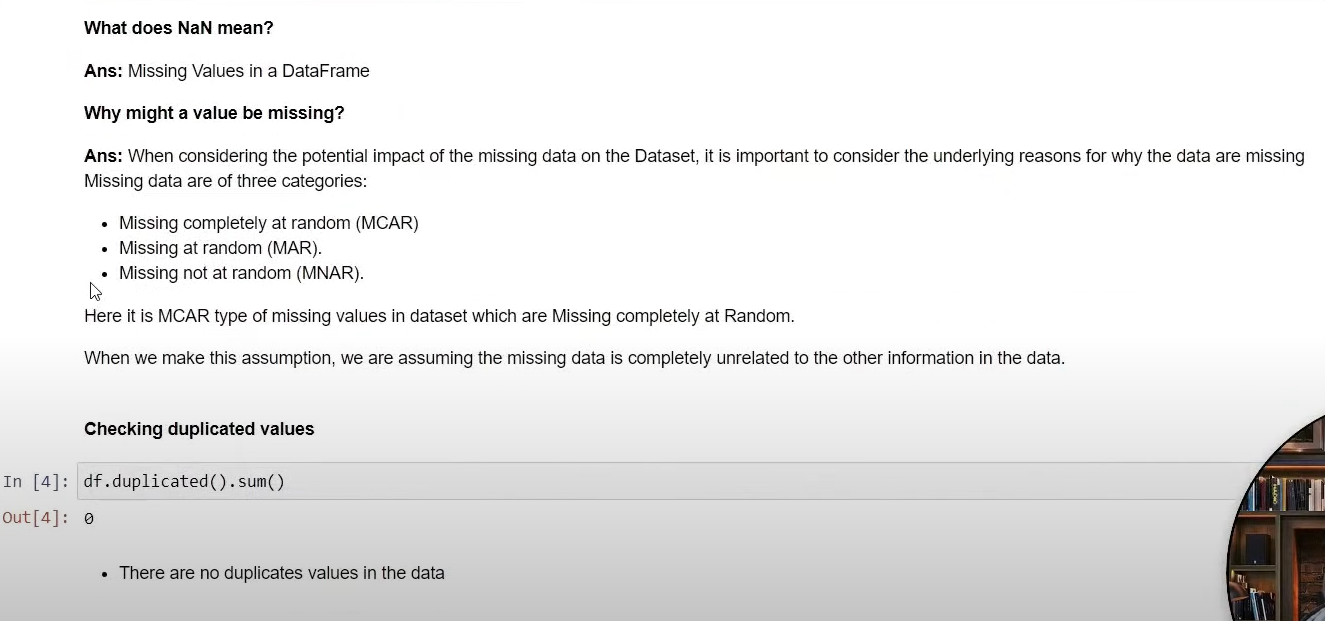

In [40]:
# Check the dupplicate values if any
df.duplicated().sum()

0

In [41]:
target_featur = "Cost"

#defining numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_features.remove(target_featur)
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]

# lets print the columns
print("The {} numerical features with dataset: {}".format(len(numarical_features),numerical_features))
print("\nThe {} categorical features with dataset: {}".format(len(categorical_features), categorical_features))

NameError: name 'numarical_features' is not defined

In [42]:
#inputing missing values with median to check the multicollinarity for numerical_features
df1 = df.copy()

for i in numerical_features:
    df1[i].fillna(df1[i].median(), inplace=True)


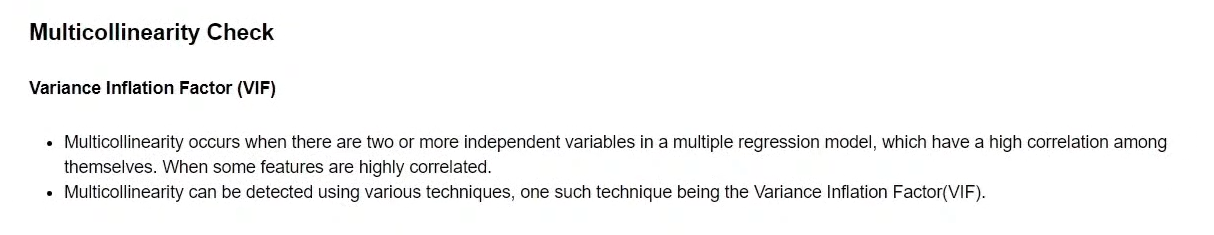
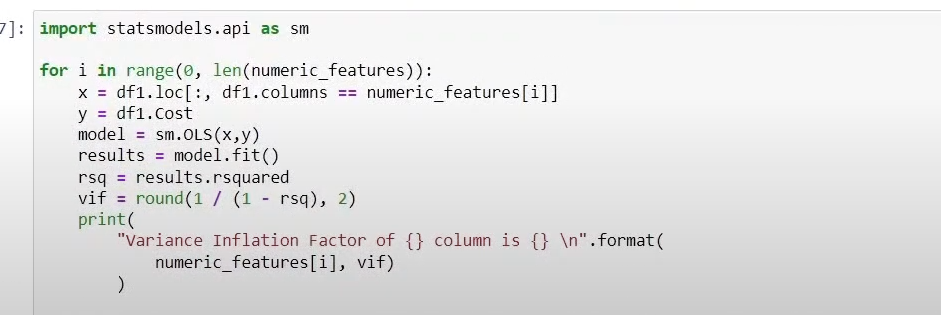

In [43]:
#! pip install statsmodels


In [44]:
import statsmodels.api as sm

for i in range(0, len(numerical_features)):
    x = df1.loc[:, df1.columns == numerical_features[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/ (1 - rsq), 2)
    print(
    "Variance inflation Factor of {} columns is {} \n".format(
    numerical_features[i], vif)
    )

Variance inflation Factor of Artist Reputation columns is 1.01 

Variance inflation Factor of Height columns is 1.01 

Variance inflation Factor of Width columns is 1.02 

Variance inflation Factor of Weight columns is 1.2 

Variance inflation Factor of Price Of Sculpture columns is 1.3 

Variance inflation Factor of Base Shipping Price columns is 1.01 



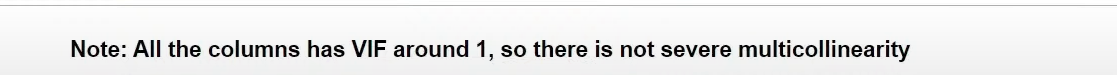

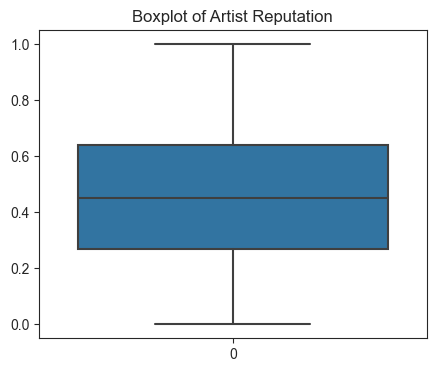

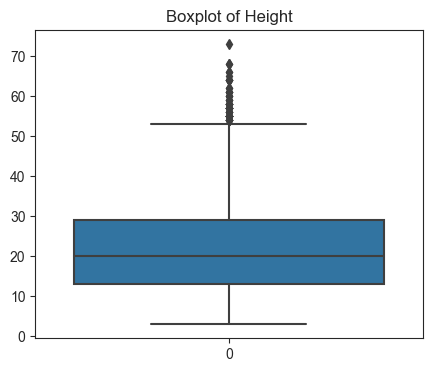

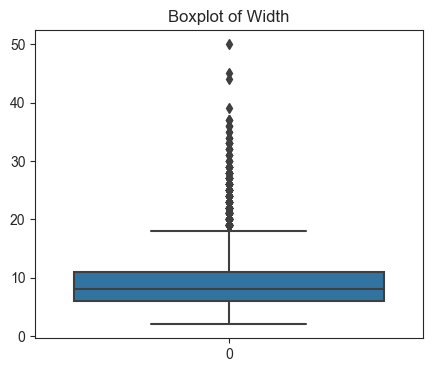

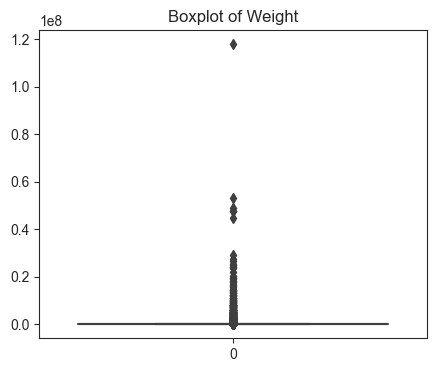

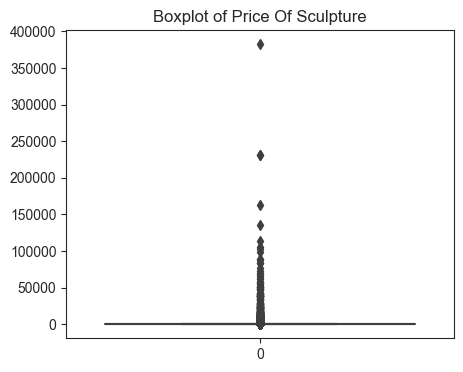

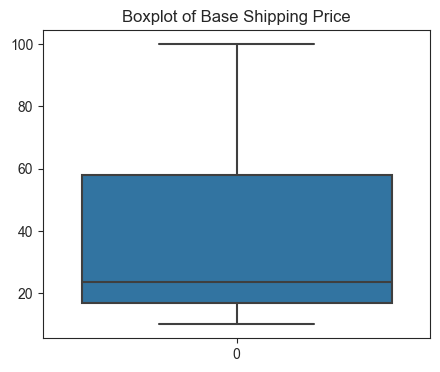

In [45]:
for i in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i])
    ax.set_title(f'Boxplot of {i}')
    plt.show()

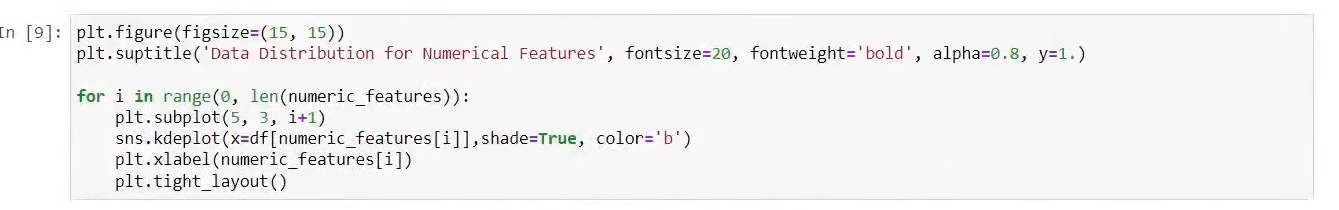

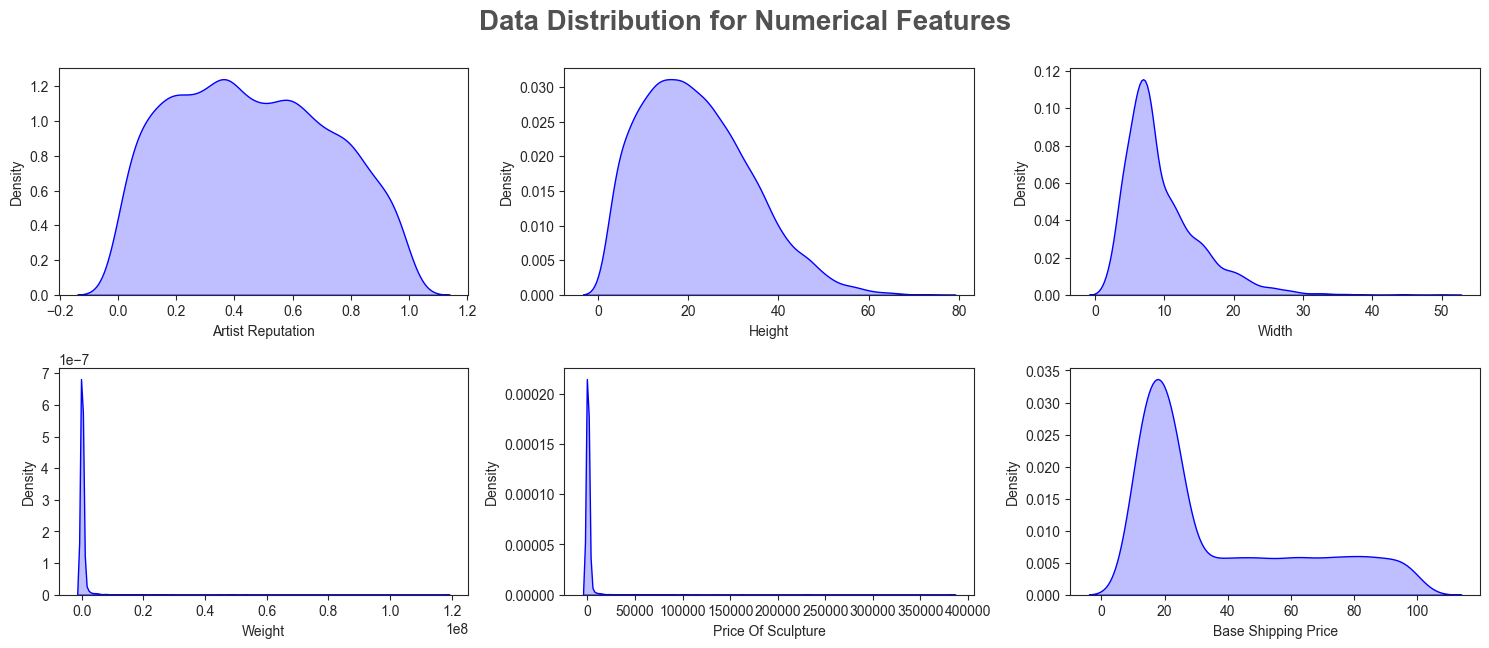

In [46]:
plt.figure(figsize=(15,15))
plt.suptitle("Data Distribution for Numerical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [47]:
df[numerical_features].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

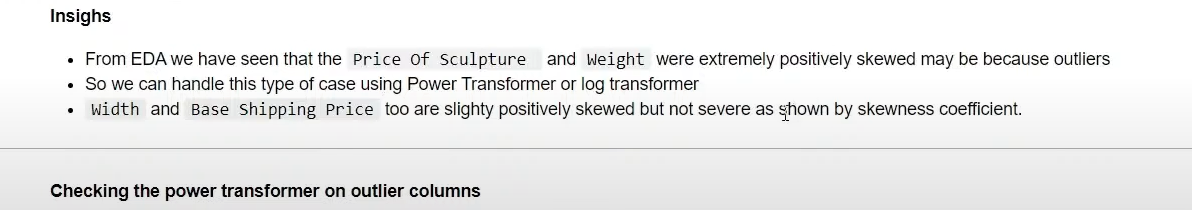

In [48]:
outlier_featur = ["Price Of Sculpture", "Weight"]

In [49]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
outlier_data = df1[outlier_featur]

In [50]:
df1[outlier_featur] = pt.fit_transform(df1[outlier_featur])

In [51]:
outlier_data = pd.DataFrame(outlier_data, columns=outlier_featur) 

outlier_data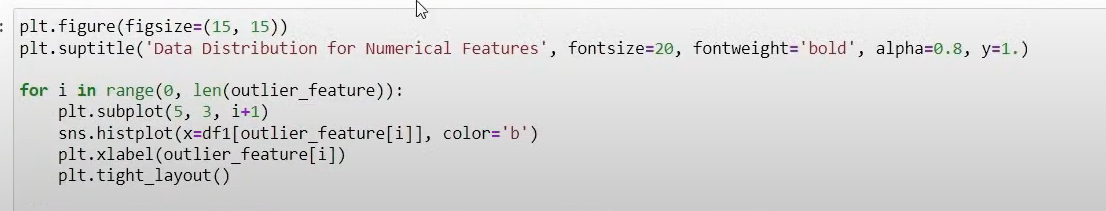

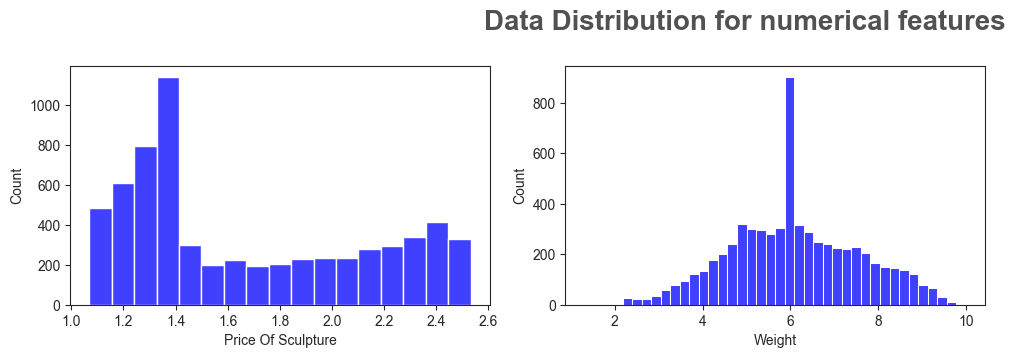

In [52]:
plt.figure(figsize=(15, 15))
plt.suptitle("Data Distribution for numerical features", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(outlier_featur)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_featur[i]], color='b')
    plt.xlabel(outlier_featur[i])
    plt.tight_layout()

In [53]:
df1[outlier_featur].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

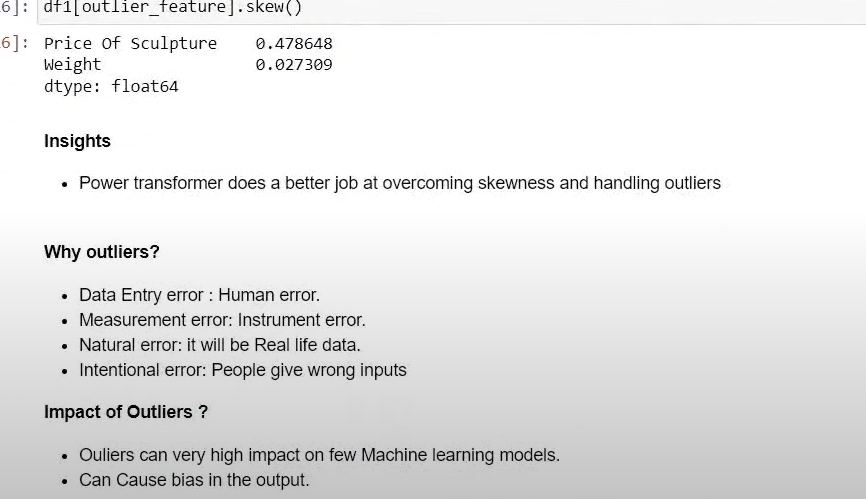

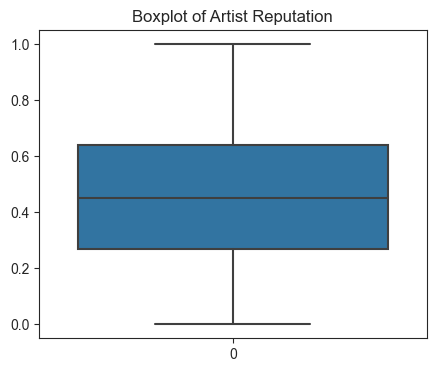

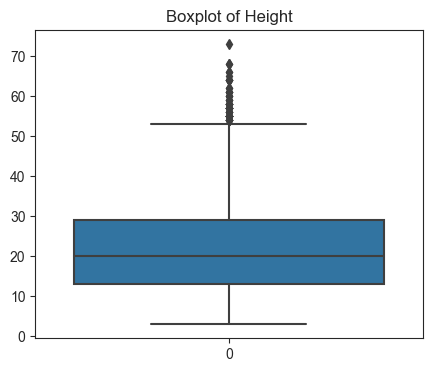

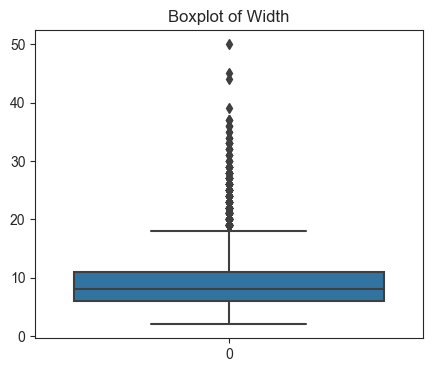

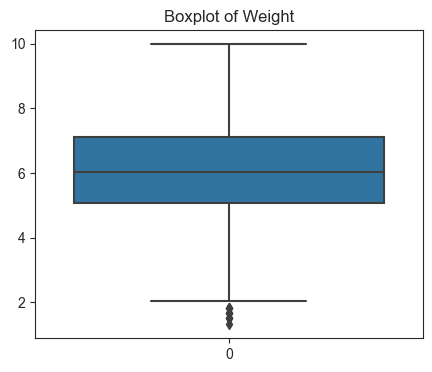

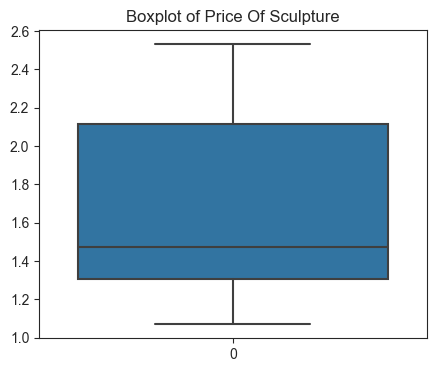

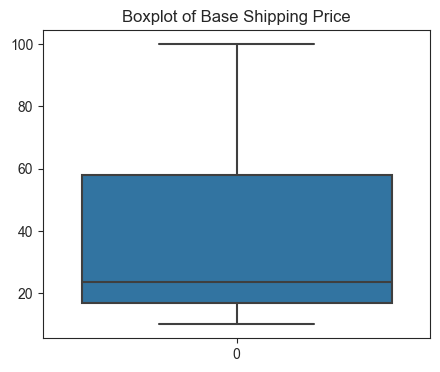

In [54]:
for i in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i])
    ax.set_title(f'Boxplot of {i}')
    plt.show()

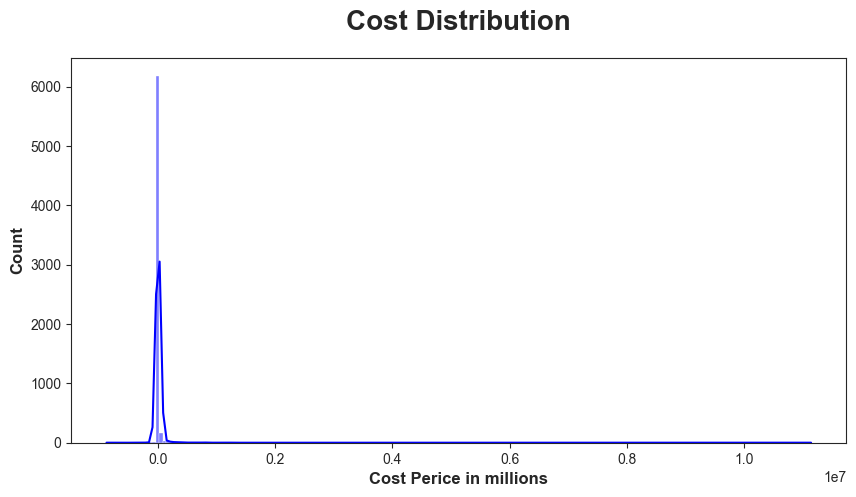

In [55]:
plt.subplots(figsize=(10,5))
sns.histplot(df["Cost"], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost Perice in millions", weight="bold", fontsize=12)
plt.show()

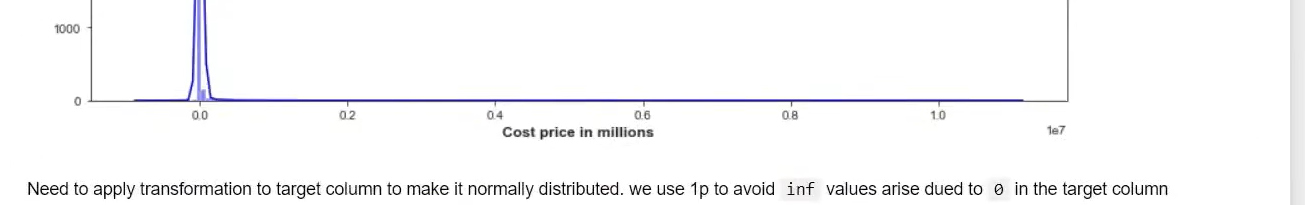

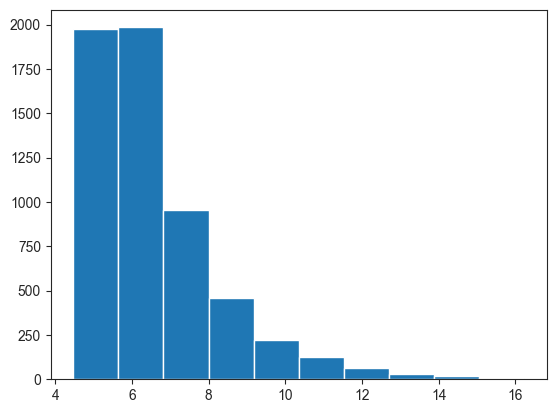

In [56]:
df1["Cost"] = np.log1p(df1["Cost"])
plt.hist(df1["Cost"]);

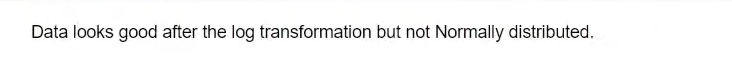

#### Feature creation for Dates columns


In [57]:
# Convert object datatype to datetime
df["Scheduled Date"] = pd.to_datetime(df["Scheduled Date"])
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"])

df["Year"] = pd.DatetimeIndex(df["Scheduled Date"]).year
df["Month"] = pd.DatetimeIndex(df["Scheduled Date"]).month

numerical_features.append("Year")
numerical_features.append("Month")


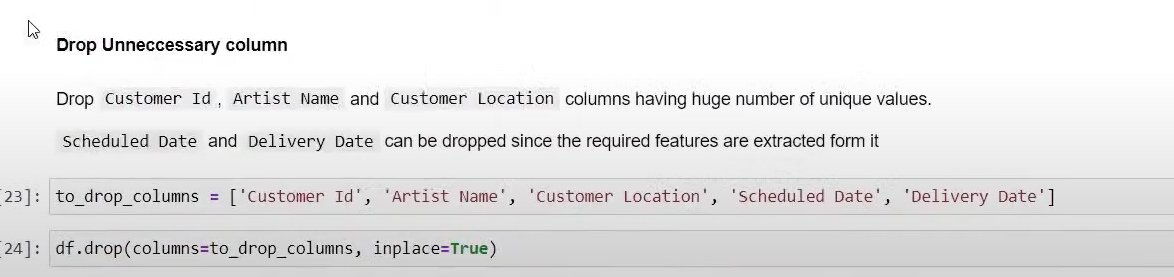

In [58]:
to_drop_col = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']
df.drop(columns=to_drop_col, inplace=True)

In [59]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor

from xgboost import XGBRegressor


In [60]:
#! pip install xgboost


In [61]:
x = df.drop(columns = ["Cost"], axis=1)
y = np.abs(df["Cost"])
y = np.log1p(y)

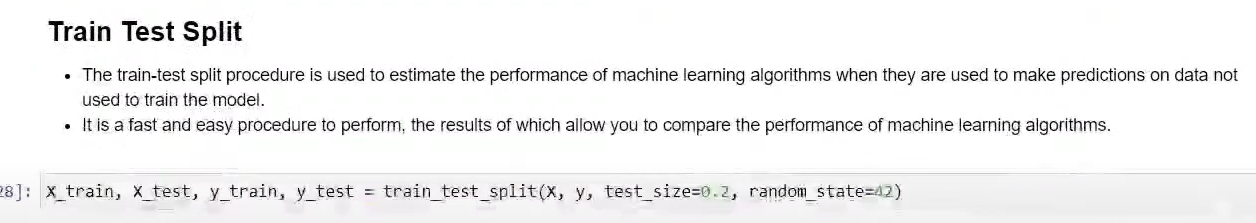

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

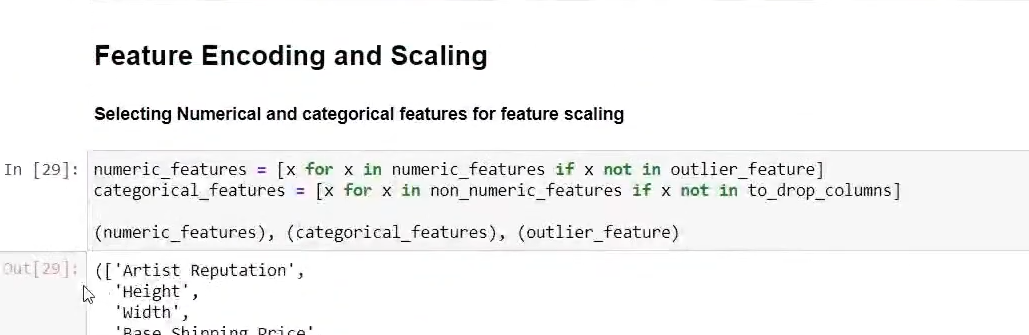

In [63]:
numerical_features = [x for x in numerical_features if x not in outlier_featur]
categorical_features = [x for x in categorical_features if x not in to_drop_col]

In [64]:
(numerical_features), (categorical_features), (outlier_featur)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Year',
  'Month'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

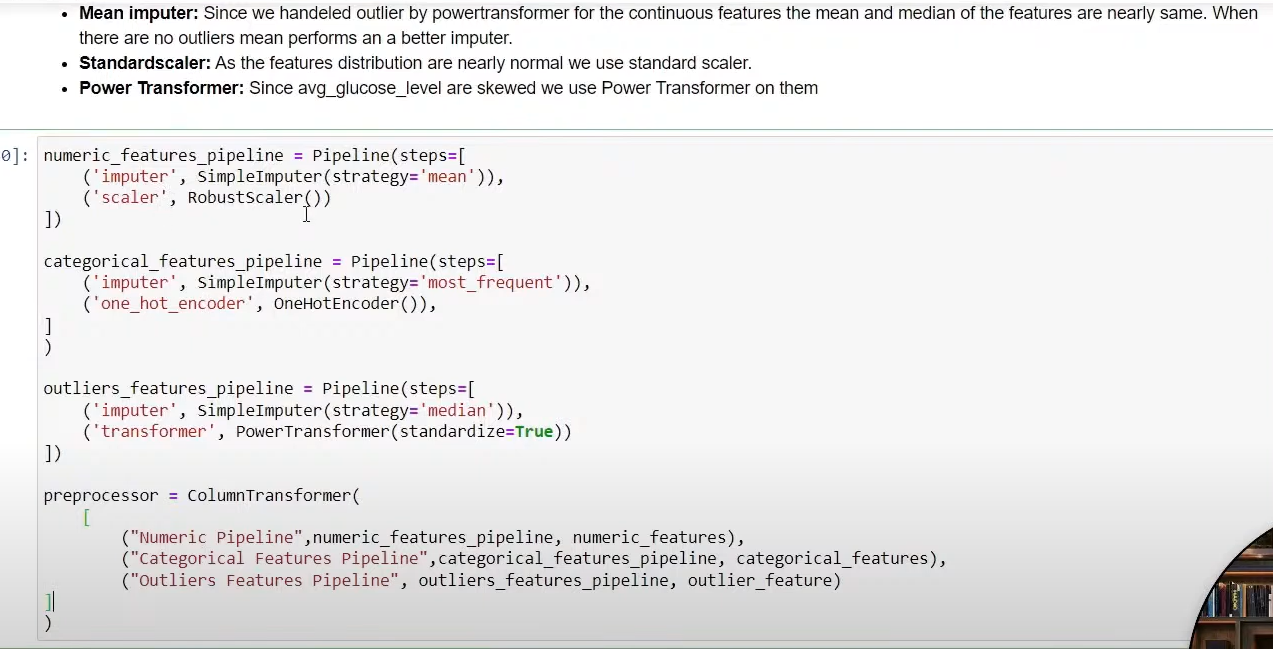

In [68]:
numerical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_features_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoder', OneHotEncoder()),
])

outliers_features_pipline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("transformer", PowerTransformer(standardize=True))
])

Preprocessor = ColumnTransformer([
    ("Numeric FeatPures ipeline", numerical_features_pipeline, numerical_features),
    ("Categorical Features Pipeline", categorical_features_pipline, categorical_features),
    ("Outliers Features Pipeline", outliers_features_pipline, outlier_featur)
    
])

In [69]:
X_train = Preprocessor.fit_transform(X_train)
X_test = Preprocessor.transform(X_test)

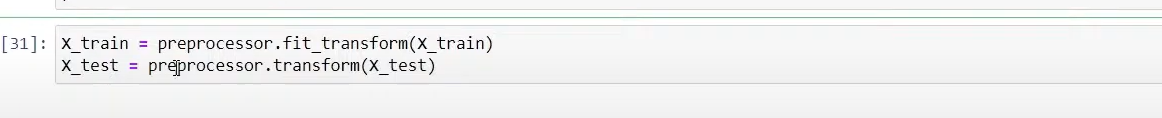
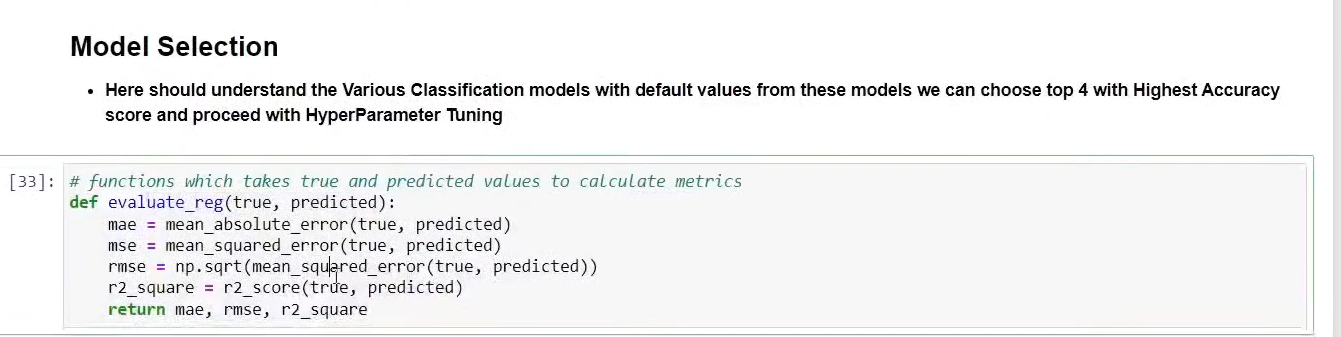

#### Model Selection

* Here shshould understand the various Regressor models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with Hyper Parameter fine tune

In [74]:
def matrics(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_absolute_error(true, pred))
    r2_square = r2_score(true, pred)
    return mae, mse, rmse, r2_square

In [106]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Evaluate model performance
        train_mse = mean_squared_error(y_train, y_train_pred, squared=False)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_rmse = np.sqrt(mean_absolute_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred, squared=False)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_absolute_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        
        results.append({
            "Model Name": name,
            "Train MSE": train_mse,
            "Train MAE": train_mae,
            "Train RMSE": train_rmse,
            "Train R2 Score": train_r2,
        
            "Test MSE": test_mse,
            "Test MAE": test_mae,
            "Test RMSE": test_rmse,
            "Test R2 Score": test_r2,
        
        })
        
        print("Model Performance for", name)
        print("Model Peformance for Training set")
        print("- mean_absolute_error (Train): {:.4f}".format(train_mae))
        print("- mean_squared_error (Train): {:.4f}".format(train_mse))
        print("- Root Mean Squared Error (Train): {:.4f}".format(train_rmse))
        print("- R2 Score (Train): {:.4f}".format(train_r2))
        
        print("-----------------------------------------------")
        
        print("Model Peformance for Test set")
        print("- mean_absolute_error (Train): {:.4f}".format(test_mae))
        print("- mean_squared_error (Train): {:.4f}".format(test_mse))            
        print("- Root Mean Squared Error (Test): {:.4f}".format(test_rmse))
        print("- R2 Score (Test): {:.4f}".format(test_r2))
        print("\n")
    
    report = pd.DataFrame(results).sort_values(by="Test R2 Score", ascending=False)
    return report


In [109]:
# Define models
models = {
    
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(max_depth=15),
    "XGB Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(max_depth=5, verbose=True),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}

evaluation_report = evaluate_models(X_train, X_test, y_train, y_test, models)
print(evaluation_report)

Model Performance for Linear Regression
Model Peformance for Training set
- mean_absolute_error (Train): 0.4971
- mean_squared_error (Train): 0.7357
- Root Mean Squared Error (Train): 0.7050
- R2 Score (Train): 0.8014
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.4841
- mean_squared_error (Train): 0.6966
- Root Mean Squared Error (Test): 0.6958
- R2 Score (Test): 0.8218


Model Performance for Random Forest
Model Peformance for Training set
- mean_absolute_error (Train): 0.0786
- mean_squared_error (Train): 0.1232
- Root Mean Squared Error (Train): 0.2804
- R2 Score (Train): 0.9944
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.2036
- mean_squared_error (Train): 0.3460
- Root Mean Squared Error (Test): 0.4512
- R2 Score (Test): 0.9560


Model Performance for K-Neighbors Regressor
Model Peformance for Training set
- mean_absolute_error (Train): 0.3614
- mean_s

119:	learn: 0.3617101	total: 541ms	remaining: 3.96s
120:	learn: 0.3604739	total: 545ms	remaining: 3.96s
121:	learn: 0.3592007	total: 549ms	remaining: 3.95s
122:	learn: 0.3589613	total: 553ms	remaining: 3.95s
123:	learn: 0.3584583	total: 558ms	remaining: 3.94s
124:	learn: 0.3578948	total: 562ms	remaining: 3.93s
125:	learn: 0.3570952	total: 564ms	remaining: 3.92s
126:	learn: 0.3554913	total: 570ms	remaining: 3.92s
127:	learn: 0.3551394	total: 575ms	remaining: 3.92s
128:	learn: 0.3536752	total: 579ms	remaining: 3.91s
129:	learn: 0.3529163	total: 584ms	remaining: 3.91s
130:	learn: 0.3519482	total: 590ms	remaining: 3.91s
131:	learn: 0.3511880	total: 595ms	remaining: 3.91s
132:	learn: 0.3507924	total: 600ms	remaining: 3.91s
133:	learn: 0.3495354	total: 605ms	remaining: 3.91s
134:	learn: 0.3485949	total: 610ms	remaining: 3.91s
135:	learn: 0.3473879	total: 614ms	remaining: 3.9s
136:	learn: 0.3466290	total: 619ms	remaining: 3.9s
137:	learn: 0.3459965	total: 624ms	remaining: 3.9s
138:	learn: 0.3

300:	learn: 0.2654141	total: 1.33s	remaining: 3.09s
301:	learn: 0.2652258	total: 1.34s	remaining: 3.09s
302:	learn: 0.2648256	total: 1.34s	remaining: 3.08s
303:	learn: 0.2646304	total: 1.34s	remaining: 3.08s
304:	learn: 0.2644832	total: 1.35s	remaining: 3.07s
305:	learn: 0.2641828	total: 1.35s	remaining: 3.06s
306:	learn: 0.2637076	total: 1.36s	remaining: 3.06s
307:	learn: 0.2634632	total: 1.36s	remaining: 3.06s
308:	learn: 0.2629626	total: 1.36s	remaining: 3.05s
309:	learn: 0.2627361	total: 1.37s	remaining: 3.05s
310:	learn: 0.2621979	total: 1.37s	remaining: 3.05s
311:	learn: 0.2616810	total: 1.38s	remaining: 3.04s
312:	learn: 0.2615082	total: 1.38s	remaining: 3.04s
313:	learn: 0.2613358	total: 1.39s	remaining: 3.03s
314:	learn: 0.2611735	total: 1.39s	remaining: 3.03s
315:	learn: 0.2608846	total: 1.4s	remaining: 3.02s
316:	learn: 0.2607508	total: 1.4s	remaining: 3.02s
317:	learn: 0.2604954	total: 1.4s	remaining: 3.01s
318:	learn: 0.2601644	total: 1.41s	remaining: 3.01s
319:	learn: 0.2

493:	learn: 0.2278627	total: 2.12s	remaining: 2.17s
494:	learn: 0.2277645	total: 2.13s	remaining: 2.17s
495:	learn: 0.2275217	total: 2.13s	remaining: 2.16s
496:	learn: 0.2273055	total: 2.13s	remaining: 2.16s
497:	learn: 0.2272324	total: 2.14s	remaining: 2.15s
498:	learn: 0.2269765	total: 2.14s	remaining: 2.15s
499:	learn: 0.2267869	total: 2.15s	remaining: 2.15s
500:	learn: 0.2265726	total: 2.15s	remaining: 2.14s
501:	learn: 0.2264548	total: 2.15s	remaining: 2.13s
502:	learn: 0.2263174	total: 2.15s	remaining: 2.13s
503:	learn: 0.2261345	total: 2.16s	remaining: 2.13s
504:	learn: 0.2260197	total: 2.16s	remaining: 2.12s
505:	learn: 0.2258599	total: 2.17s	remaining: 2.12s
506:	learn: 0.2256665	total: 2.17s	remaining: 2.11s
507:	learn: 0.2255864	total: 2.17s	remaining: 2.1s
508:	learn: 0.2254745	total: 2.18s	remaining: 2.1s
509:	learn: 0.2253690	total: 2.18s	remaining: 2.1s
510:	learn: 0.2250740	total: 2.19s	remaining: 2.09s
511:	learn: 0.2249521	total: 2.19s	remaining: 2.09s
512:	learn: 0.2

679:	learn: 0.2064690	total: 2.91s	remaining: 1.37s
680:	learn: 0.2063622	total: 2.92s	remaining: 1.37s
681:	learn: 0.2063048	total: 2.92s	remaining: 1.36s
682:	learn: 0.2061854	total: 2.92s	remaining: 1.36s
683:	learn: 0.2060794	total: 2.93s	remaining: 1.35s
684:	learn: 0.2060394	total: 2.93s	remaining: 1.35s
685:	learn: 0.2058555	total: 2.94s	remaining: 1.34s
686:	learn: 0.2057438	total: 2.94s	remaining: 1.34s
687:	learn: 0.2056597	total: 2.95s	remaining: 1.34s
688:	learn: 0.2055343	total: 2.95s	remaining: 1.33s
689:	learn: 0.2054713	total: 2.96s	remaining: 1.33s
690:	learn: 0.2053524	total: 2.96s	remaining: 1.32s
691:	learn: 0.2052559	total: 2.97s	remaining: 1.32s
692:	learn: 0.2051610	total: 2.97s	remaining: 1.32s
693:	learn: 0.2050750	total: 2.98s	remaining: 1.31s
694:	learn: 0.2049581	total: 2.98s	remaining: 1.31s
695:	learn: 0.2048989	total: 2.98s	remaining: 1.3s
696:	learn: 0.2047785	total: 2.99s	remaining: 1.3s
697:	learn: 0.2046577	total: 2.99s	remaining: 1.29s
698:	learn: 0.

854:	learn: 0.1928759	total: 3.69s	remaining: 625ms
855:	learn: 0.1928424	total: 3.69s	remaining: 621ms
856:	learn: 0.1928031	total: 3.69s	remaining: 616ms
857:	learn: 0.1926912	total: 3.7s	remaining: 613ms
858:	learn: 0.1926205	total: 3.71s	remaining: 608ms
859:	learn: 0.1925449	total: 3.71s	remaining: 604ms
860:	learn: 0.1924681	total: 3.72s	remaining: 600ms
861:	learn: 0.1924033	total: 3.72s	remaining: 596ms
862:	learn: 0.1923106	total: 3.73s	remaining: 592ms
863:	learn: 0.1922002	total: 3.73s	remaining: 587ms
864:	learn: 0.1921806	total: 3.73s	remaining: 583ms
865:	learn: 0.1921203	total: 3.74s	remaining: 579ms
866:	learn: 0.1920390	total: 3.74s	remaining: 574ms
867:	learn: 0.1918575	total: 3.75s	remaining: 570ms
868:	learn: 0.1918040	total: 3.75s	remaining: 566ms
869:	learn: 0.1917080	total: 3.76s	remaining: 561ms
870:	learn: 0.1916492	total: 3.76s	remaining: 557ms
871:	learn: 0.1916057	total: 3.77s	remaining: 553ms
872:	learn: 0.1915437	total: 3.77s	remaining: 548ms
873:	learn: 0

Model Performance for SVR
Model Peformance for Training set
- mean_absolute_error (Train): 0.2297
- mean_squared_error (Train): 0.4694
- Root Mean Squared Error (Train): 0.4792
- R2 Score (Train): 0.9192
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.2585
- mean_squared_error (Train): 0.4866
- Root Mean Squared Error (Test): 0.5085
- R2 Score (Test): 0.9130


              Model Name  Train MSE  Train MAE  Train RMSE  Train R2 Score  \
5  CatBoosting Regressor   0.182990   0.117984    0.343488        0.987715   
4          XGB Regressor   0.101866   0.068014    0.260795        0.996193   
1          Random Forest   0.123169   0.078639    0.280426        0.994434   
7                    SVR   0.469386   0.229666    0.479235        0.919169   
3          Decision Tree   0.055728   0.020186    0.142077        0.998861   
6     AdaBoost Regressor   0.585526   0.486271    0.697331        0.874221   
2  K-Neighbors Regressor   0

In [110]:
evaluation_report

,Model Name,Train MSE,Train MAE,Train RMSE,Train R2 Score,Test MSE,Test MAE,Test RMSE,Test R2 Score
5,CatBoosting Regressor,0.182990,0.117984,0.343488,0.987715,0.274947,0.162109,0.402627,0.972231
4,XGB Regressor,0.101866,0.068014,0.260795,0.996193,0.336738,0.188986,0.434725,0.958347
1,Random Forest,0.123169,0.078639,0.280426,0.994434,0.345989,0.203567,0.451184,0.956027
7,SVR,0.469386,0.229666,0.479235,0.919169,0.486570,0.258535,0.508463,0.913033
3,Decision Tree,0.055728,0.020186,0.142077,0.998861,0.517511,0.322061,0.567504,0.901621
6,AdaBoost Regressor,0.585526,0.486271,0.697331,0.874221,0.615430,0.496192,0.704409,0.860871
2,K-Neighbors Regressor,0.567540,0.361359,0.601131,0.881829,0.658831,0.426334,0.652943,0.840555
0,Linear Regression,0.735678,0.497076,0.705036,0.801440,0.696556,0.484115,0.695783,0.821773


### Hyperparameter Tuning
##### Initialize few parameter for Hyperparamter tuning

In [116]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators":[100, 200, 500, 1000] 
             }

xgboost_params = {"learning_rate":[0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators":[100, 200, 300],
                  "colsample_bytree":[0.5, 0.8, 1, 0.3, 0.4]
                 }

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]}

In [117]:
# Model list for hyperparameter turning
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                  "XGBoost", XGBRegressor(), xgboost_params,
                  "CatBoost", CatBoostRegressor(verbose=True), cat_params]

In [119]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1
                               )
    
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"----Best Params for {model_name} -------")
    print(model_params[model_name])
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=500; total time=   9.7s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=500; total time=   9.5s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=500; total time=   9.5s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   3.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   3.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   3.9s
[CV] END max_depth=5, max_features=5, min_samples_split

[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_de

[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=1000; total time=  10.2s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=1000; total time=  10.0s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=1000; total time=   9.9s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   4.2s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   4.1s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   4.1s
[CV] END max_d

[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   2.2s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=1000; total time=   7.0s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=1000; total time=   7.2s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=1000; total time=   7.2s
[CV] END max_depth=15, max_

ValueError: too many values to unpack (expected 3)

In [ ]:
#re-initialized models with best params
models = {
    "Random Forest Regressor": RandomForestRegressor(*n_jobs=l_params["RF"], n_jobs=-1),
    "XGB Regressor": XGBRegressor(**model_params["XGBoost"], n_jobs=-1),
    "CatBoosting Regressor": CatBoostRegressor(**model_params["CatBoost"], verbose=False)
}

grid_model_evaluation = evaluate_models(X_train, X_test, y_train, y_test, models)

In [ ]:
grid_model_evaluation

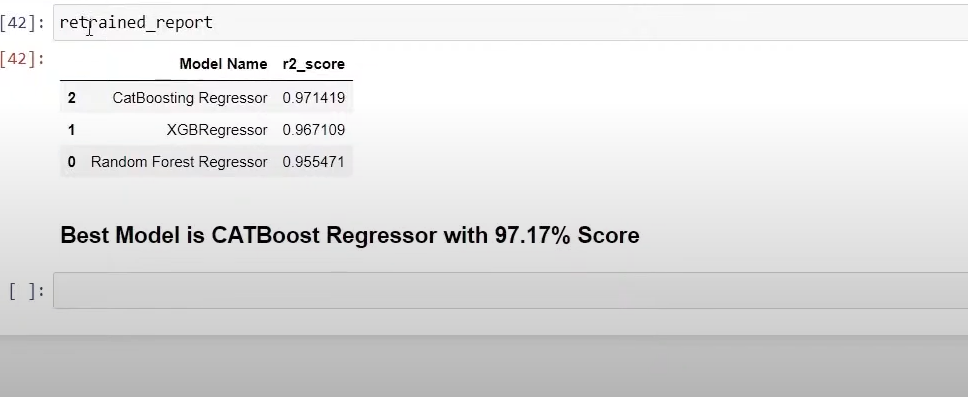